In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from datasets import load_data
from model import model_summary,S8_Model_LN
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('S8/util.py')
from util import test, train, plot_acc_loss
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')
print(device)

c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


cuda


In [2]:
train_loader ,  test_loader  = load_data()


Files already downloaded and verified
Files already downloaded and verified


In [4]:
model = S8_Model_LN().to(device)
model_summary(model,input_size= (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]           1,176
         LayerNorm-2            [-1, 8, 32, 32]          16,384
              ReLU-3            [-1, 8, 32, 32]               0
           Dropout-4            [-1, 8, 32, 32]               0
            Conv2d-5            [-1, 4, 32, 32]             292
         LayerNorm-6            [-1, 4, 32, 32]           8,192
              ReLU-7            [-1, 4, 32, 32]               0
           Dropout-8            [-1, 4, 32, 32]               0
            Conv2d-9            [-1, 8, 32, 32]              40
        MaxPool2d-10            [-1, 8, 16, 16]               0
           Conv2d-11            [-1, 4, 16, 16]             292
        LayerNorm-12            [-1, 4, 16, 16]           2,048
             ReLU-13            [-1, 4, 16, 16]               0
          Dropout-14            [-1, 4,

In [5]:
criterion = F.nll_loss
num_epochs = 20
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer_sgd,gamma=0.99,step_size=5)


for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer_sgd,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()



Epoch 1


Train: Loss=2.2008 Batch_id=97 Accuracy=12.25: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]


Test set: Average loss: 0.0044, Accuracy: 1677/10000 (16.77%)

Epoch 2


Train: Loss=2.1112 Batch_id=97 Accuracy=18.76: 100%|██████████| 98/98 [00:22<00:00,  4.40it/s]


Test set: Average loss: 0.0042, Accuracy: 1921/10000 (19.21%)

Epoch 3


Train: Loss=2.0272 Batch_id=97 Accuracy=19.30: 100%|██████████| 98/98 [00:23<00:00,  4.14it/s]


Test set: Average loss: 0.0041, Accuracy: 1903/10000 (19.03%)

Epoch 4


Train: Loss=2.0298 Batch_id=97 Accuracy=19.73: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s]


Test set: Average loss: 0.0040, Accuracy: 1804/10000 (18.04%)

Epoch 5


Train: Loss=1.9934 Batch_id=97 Accuracy=19.71: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]


Test set: Average loss: 0.0041, Accuracy: 1687/10000 (16.87%)

Epoch 6


Train: Loss=1.9932 Batch_id=97 Accuracy=20.15: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]


Test set: Average loss: 0.0039, Accuracy: 1996/10000 (19.96%)

Epoch 7


Train: Loss=1.9617 Batch_id=97 Accuracy=20.80: 100%|██████████| 98/98 [00:21<00:00,  4.54it/s]


Test set: Average loss: 0.0039, Accuracy: 2021/10000 (20.21%)

Epoch 8


Train: Loss=1.9768 Batch_id=97 Accuracy=21.66: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


Test set: Average loss: 0.0039, Accuracy: 2176/10000 (21.76%)

Epoch 9


Train: Loss=1.8865 Batch_id=97 Accuracy=22.60: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]


Test set: Average loss: 0.0039, Accuracy: 2127/10000 (21.27%)

Epoch 10


Train: Loss=1.9309 Batch_id=97 Accuracy=23.62: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]


Test set: Average loss: 0.0038, Accuracy: 2459/10000 (24.59%)

Epoch 11


Train: Loss=1.9662 Batch_id=97 Accuracy=24.50: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]


Test set: Average loss: 0.0038, Accuracy: 2498/10000 (24.98%)

Epoch 12


Train: Loss=1.8944 Batch_id=97 Accuracy=25.00: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]


Test set: Average loss: 0.0038, Accuracy: 2507/10000 (25.07%)

Epoch 13


Train: Loss=1.8837 Batch_id=97 Accuracy=25.20: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]


Test set: Average loss: 0.0037, Accuracy: 2539/10000 (25.39%)

Epoch 14


Train: Loss=1.8423 Batch_id=97 Accuracy=25.74: 100%|██████████| 98/98 [00:20<00:00,  4.67it/s]


Test set: Average loss: 0.0037, Accuracy: 2679/10000 (26.79%)

Epoch 15


Train: Loss=1.8499 Batch_id=97 Accuracy=25.89: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]


Test set: Average loss: 0.0037, Accuracy: 2506/10000 (25.06%)

Epoch 16


Train: Loss=1.8536 Batch_id=97 Accuracy=26.10: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]


Test set: Average loss: 0.0037, Accuracy: 2497/10000 (24.97%)

Epoch 17


Train: Loss=1.8511 Batch_id=97 Accuracy=25.74: 100%|██████████| 98/98 [00:21<00:00,  4.60it/s]


Test set: Average loss: 0.0037, Accuracy: 2601/10000 (26.01%)

Epoch 18


Train: Loss=1.7983 Batch_id=97 Accuracy=26.75: 100%|██████████| 98/98 [00:20<00:00,  4.78it/s]


Test set: Average loss: 0.0036, Accuracy: 2699/10000 (26.99%)

Epoch 19


Train: Loss=1.8442 Batch_id=97 Accuracy=27.17: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]


Test set: Average loss: 0.0037, Accuracy: 2482/10000 (24.82%)

Epoch 20


Train: Loss=1.8531 Batch_id=97 Accuracy=27.61: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


Test set: Average loss: 0.0036, Accuracy: 2788/10000 (27.88%)



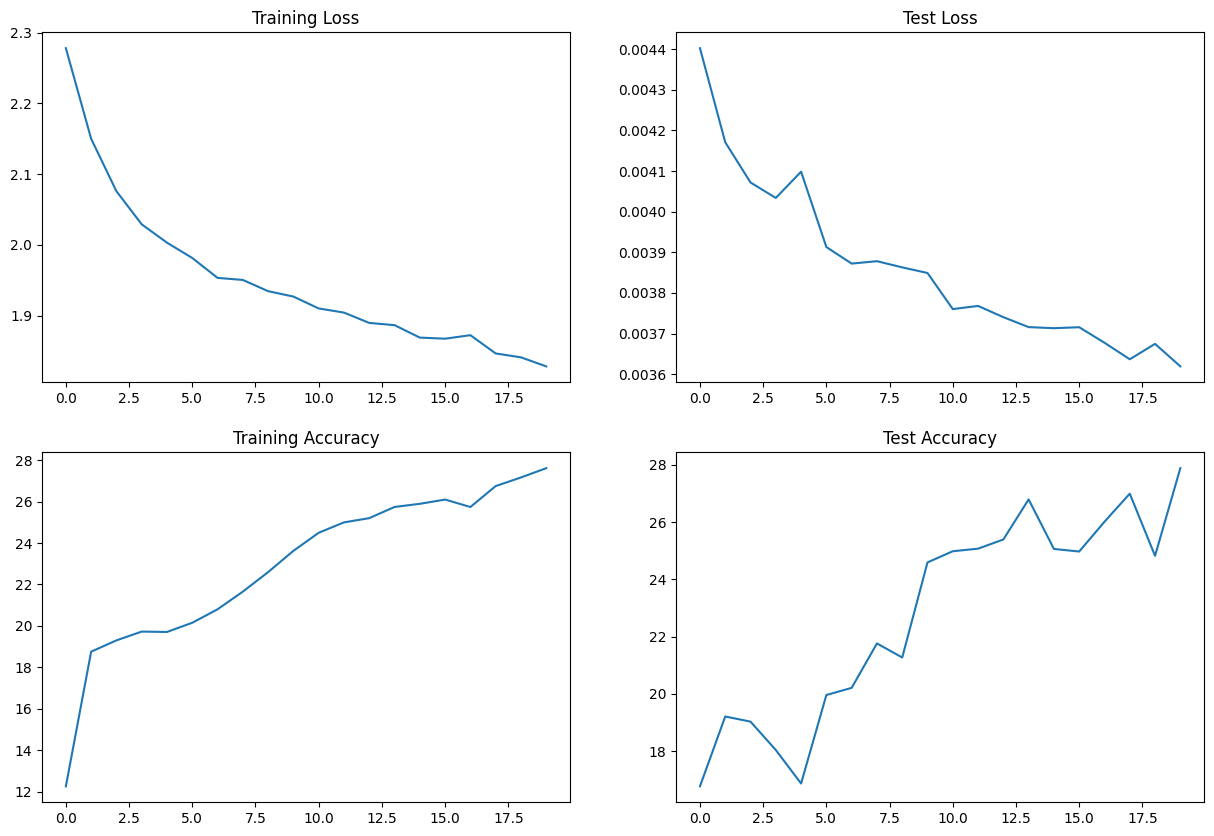

In [6]:
plot_acc_loss()

In [7]:
optimizer_adam = optim.Adam(model.parameters(), lr=1e-4,weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer_adam, step_size=5, gamma=0.1, verbose=True)
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer_adam,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()




c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=1.7593 Batch_id=97 Accuracy=28.20: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]


Test set: Average loss: 0.0036, Accuracy: 2783/10000 (27.83%)

Epoch 2


Train: Loss=1.7853 Batch_id=97 Accuracy=28.34: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]


Test set: Average loss: 0.0036, Accuracy: 2788/10000 (27.88%)

Epoch 3


Train: Loss=1.8330 Batch_id=97 Accuracy=28.71: 100%|██████████| 98/98 [00:19<00:00,  4.96it/s]


Test set: Average loss: 0.0036, Accuracy: 2785/10000 (27.85%)

Epoch 4


Train: Loss=1.7791 Batch_id=97 Accuracy=28.72: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]


Test set: Average loss: 0.0036, Accuracy: 2813/10000 (28.13%)

Epoch 5


Train: Loss=1.7986 Batch_id=97 Accuracy=28.57: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]


Test set: Average loss: 0.0036, Accuracy: 2805/10000 (28.05%)

Epoch 6


Train: Loss=1.8081 Batch_id=97 Accuracy=28.83: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]


Test set: Average loss: 0.0036, Accuracy: 2798/10000 (27.98%)

Epoch 7


Train: Loss=1.7986 Batch_id=97 Accuracy=28.63: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]


Test set: Average loss: 0.0036, Accuracy: 2809/10000 (28.09%)

Epoch 8


Train: Loss=1.8329 Batch_id=97 Accuracy=28.80: 100%|██████████| 98/98 [00:19<00:00,  4.93it/s]


Test set: Average loss: 0.0036, Accuracy: 2802/10000 (28.02%)

Epoch 9


Train: Loss=1.7819 Batch_id=97 Accuracy=28.86: 100%|██████████| 98/98 [00:19<00:00,  4.90it/s]


Test set: Average loss: 0.0036, Accuracy: 2823/10000 (28.23%)

Epoch 10


Train: Loss=1.8303 Batch_id=97 Accuracy=28.88: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]


Test set: Average loss: 0.0036, Accuracy: 2804/10000 (28.04%)

Epoch 11


Train: Loss=1.7883 Batch_id=97 Accuracy=28.70: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]


Test set: Average loss: 0.0036, Accuracy: 2797/10000 (27.97%)

Epoch 12


Train: Loss=1.7926 Batch_id=97 Accuracy=28.77: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]


Test set: Average loss: 0.0036, Accuracy: 2799/10000 (27.99%)

Epoch 13


Train: Loss=1.7529 Batch_id=97 Accuracy=28.97: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]


Test set: Average loss: 0.0036, Accuracy: 2801/10000 (28.01%)

Epoch 14


Train: Loss=1.7675 Batch_id=97 Accuracy=28.95: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]


Test set: Average loss: 0.0036, Accuracy: 2804/10000 (28.04%)

Epoch 15


Train: Loss=1.7978 Batch_id=97 Accuracy=28.85: 100%|██████████| 98/98 [00:21<00:00,  4.59it/s]


Test set: Average loss: 0.0036, Accuracy: 2800/10000 (28.00%)

Epoch 16


Train: Loss=1.7446 Batch_id=97 Accuracy=28.85: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]


Test set: Average loss: 0.0036, Accuracy: 2800/10000 (28.00%)

Epoch 17


Train: Loss=1.8251 Batch_id=97 Accuracy=28.93: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]


Test set: Average loss: 0.0036, Accuracy: 2800/10000 (28.00%)

Epoch 18


Train: Loss=1.7734 Batch_id=97 Accuracy=28.76: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]


Test set: Average loss: 0.0036, Accuracy: 2798/10000 (27.98%)

Epoch 19


Train: Loss=1.8250 Batch_id=97 Accuracy=28.80: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]


Test set: Average loss: 0.0036, Accuracy: 2798/10000 (27.98%)

Epoch 20


Train: Loss=1.8330 Batch_id=97 Accuracy=28.96: 100%|██████████| 98/98 [00:19<00:00,  4.93it/s]


Test set: Average loss: 0.0036, Accuracy: 2798/10000 (27.98%)



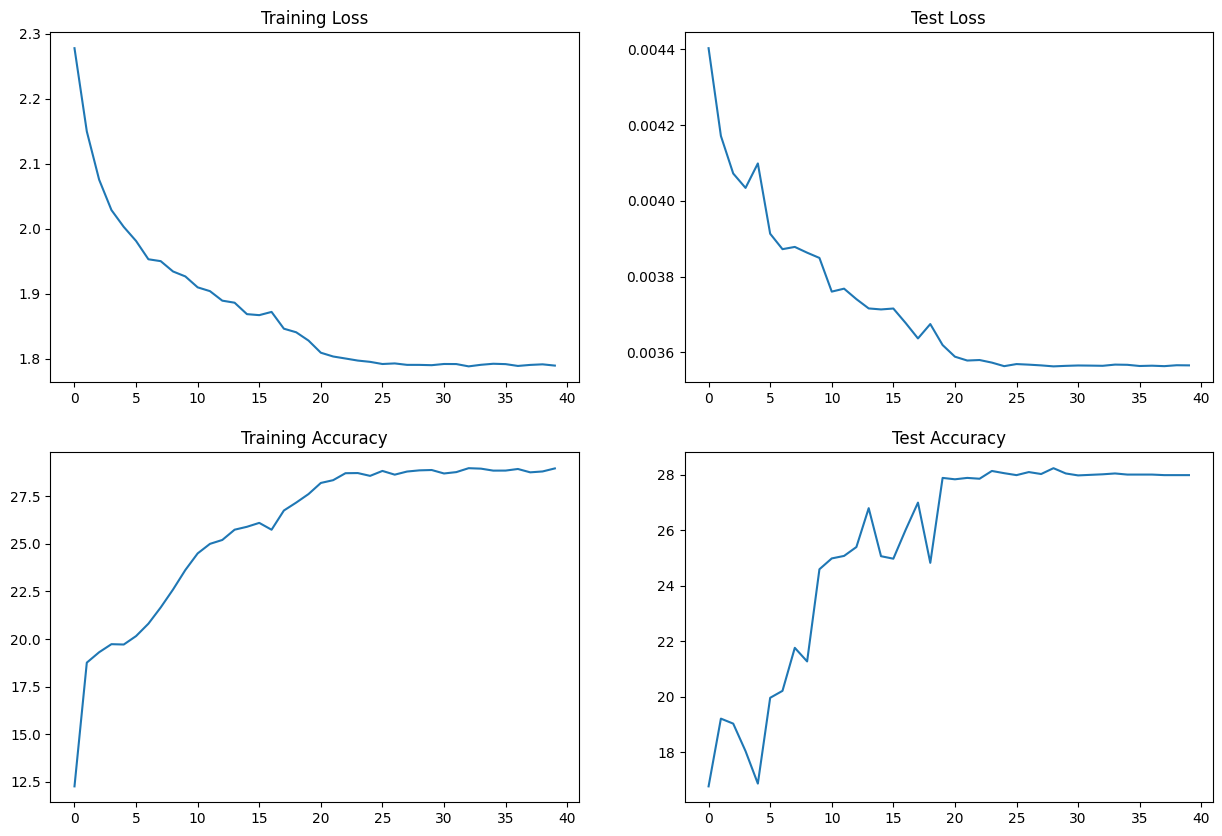

In [8]:
plot_acc_loss()

In [9]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

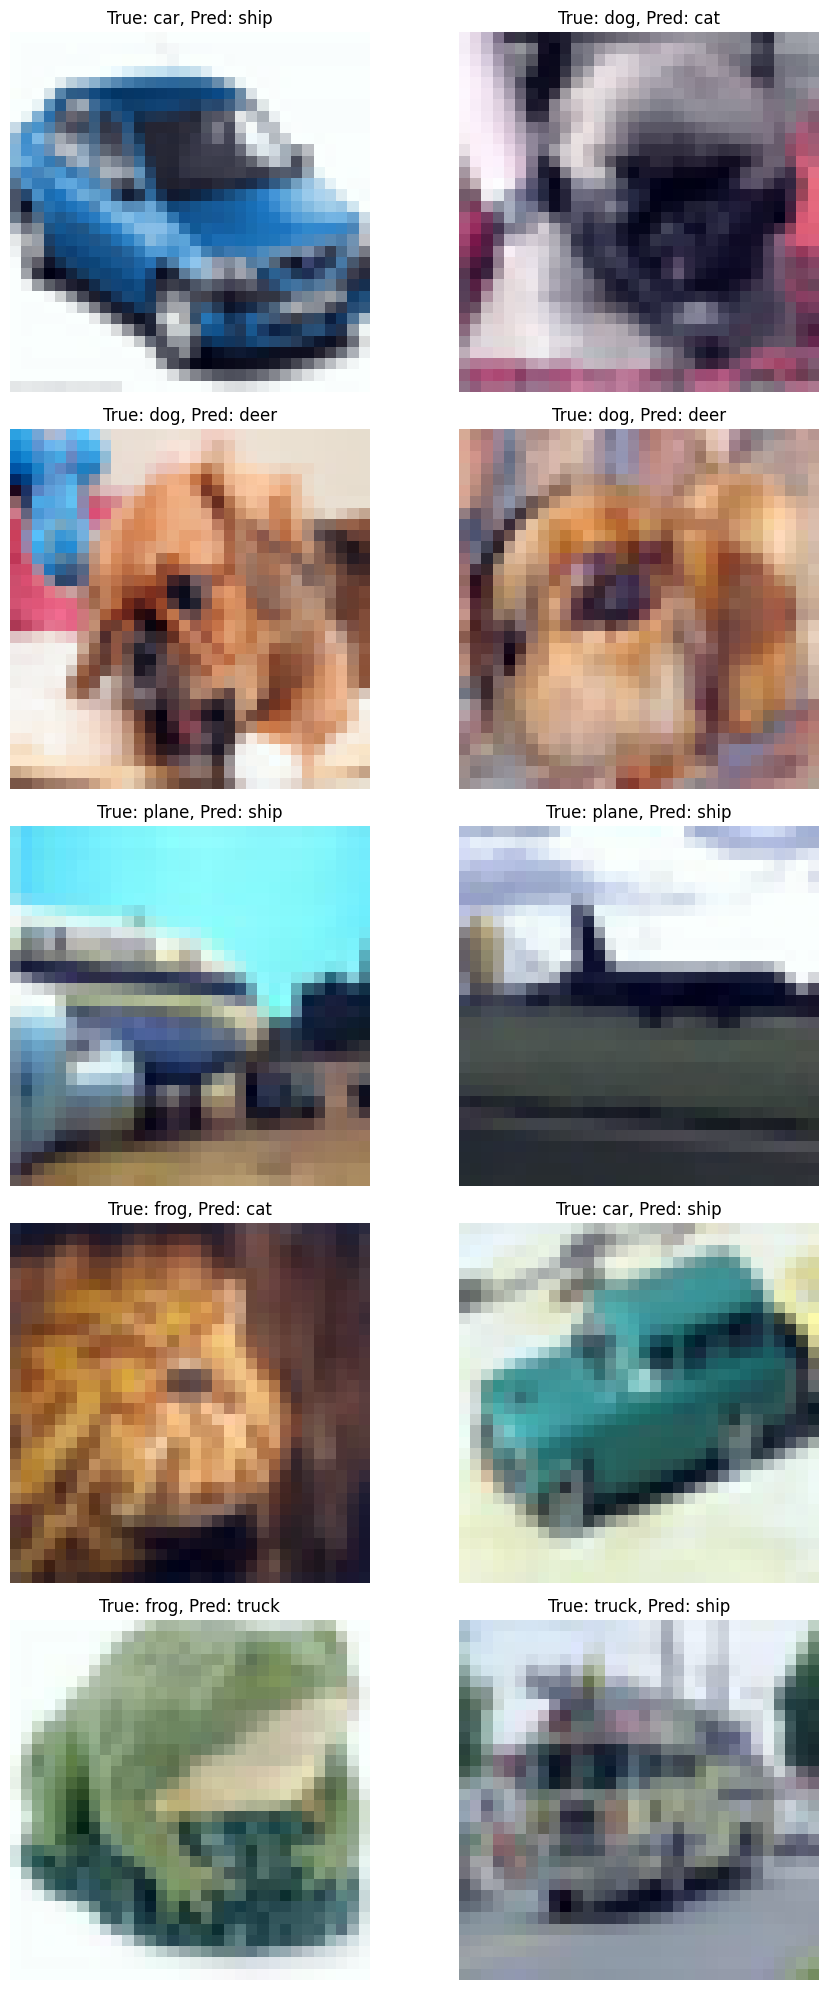

In [10]:
def find_and_visualize_misclassified_images(model, device, test_loader, criterion, classes, num_images=10):
    model.eval()  # Set the model to evaluation mode
    misclassified_images = []
    misclassified_true = []
    misclassified_pred = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, preds = torch.max(output, 1)
            misclassified_idxs = (preds != target).nonzero(as_tuple=False).squeeze()

            for idx in misclassified_idxs:
                if len(misclassified_images) < num_images:
                    misclassified_images.append(data[idx].cpu())
                    misclassified_true.append(target[idx].cpu())
                    misclassified_pred.append(preds[idx].cpu())
                else:
                    plot_misclassified_images(misclassified_images, misclassified_true, misclassified_pred, classes)
                    return
    if misclassified_images:
        plot_misclassified_images(misclassified_images, misclassified_true, misclassified_pred, classes)
import matplotlib.pyplot as plt

def plot_misclassified_images(images, true_labels, predicted_labels, classes):
    fig, axes = plt.subplots((len(images) + 1) // 2, 2, figsize=(10, 20))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            img = images[i].numpy().transpose((1, 2, 0))
            img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0,1]
            ax.imshow(img)
            ax.set_title(f"True: {classes[true_labels[i].item()]}, Pred: {classes[predicted_labels[i].item()]}")
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()


# Assume 'model', 'device', 'test_loader', 'criterion', and 'classes' are already defined
find_and_visualize_misclassified_images(model, device, test_loader, criterion, classes)
